In [ ]:
# This a unsupervised ML Problem (there ar only input no output)  and a complex technique (math complex)
# makes model faster as less no. of features

In [ ]:
# this preserves the essence of the data when it was is the higher dimension and is the best for 
# dimensionality reduction

In [ ]:
# Benifits 
# 1. computation faster and less  memory consumption
# 2. Visualisation as human cannot visualize in more than 3D

In [ ]:
# Inn PCA we dont use MAD(MEan Absolute Deviation)(|x|) as the mod function is not differntiable at 0
# therfore we cannot use optimizatio algorithim after applying PCA later on in the process of modle building

In [ ]:
# Variance is important to preserve the relationship between the data points which they have in larger 
# dimension space in this
# Ex - Photograph by a media men for which he hass to take the photo of players from all the angle inorder
# to get the best possible outcome and the variance is also preserve

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = load_digits()

In [3]:
#mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
df = pd.DataFrame(mnist.data)

In [7]:
df.shape

(1797, 64)

In [8]:
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [9]:
Y= pd.DataFrame(mnist.target).to_numpy()

In [10]:
Y

array([[0],
       [1],
       [2],
       ...,
       [8],
       [9],
       [8]])

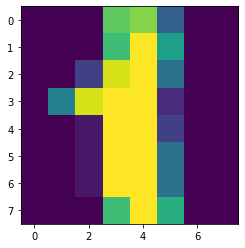

In [11]:
plt.imshow(mnist.images[1])

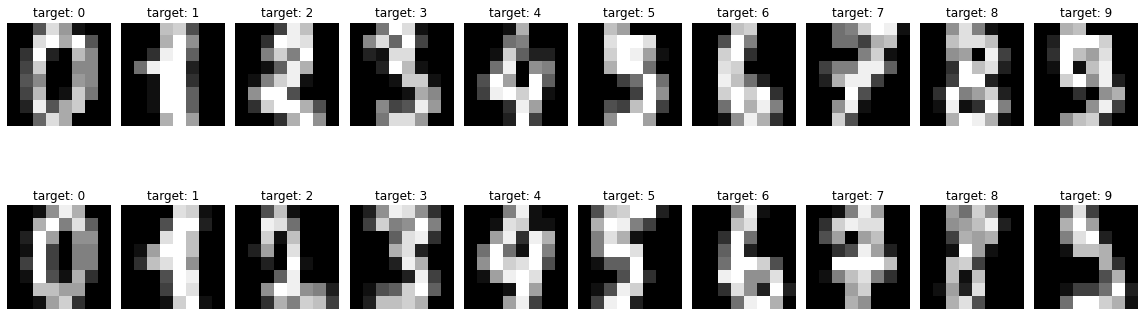

In [12]:
# https://h1ros.github.io/posts/loading-scikit-learns-mnist-dataset/
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train,y_test = train_test_split(df,Y,test_size=0.1,random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
k.fit(X_train,y_train)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [15]:
y_pred = k.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9722222222222222

# PCA

In [17]:
# First we have to standerdise the data
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

In [18]:
X_train_t = st.fit_transform(X_train)
X_test_t = st.transform(X_test)

In [19]:
# PCA Importation
from sklearn.decomposition import PCA
pca = PCA(n_components=64) 
# n_components bata he kitna features chahiye Principal Component feature chahiye reduced wala
# none matlab sara features lerahe jitna column h tumhara 

In [20]:
X_train_t = pca.fit_transform(X_train_t)
X_test_t = pca.transform(X_test_t)

In [21]:
X_train_t.shape

(1617, 64)

In [22]:
X_train_t[4]

array([-5.64052335e-01, -2.23625249e+00, -4.07311176e+00,  1.33193099e+00,
        1.38348290e-01, -4.31512184e-01, -1.38905384e+00, -6.84762395e-02,
       -5.59528370e-01,  1.04949838e+00,  1.27778487e+00, -9.61233665e-01,
       -1.41122801e+00, -7.21341482e-01, -5.17692475e-02,  1.34785843e-01,
       -9.39759548e-01, -1.41420660e+00,  1.43767378e+00, -3.53915852e-01,
        6.35960701e-01,  2.61018605e-01, -2.91847003e-01, -4.26197980e-01,
        7.00003538e-01,  7.50425672e-01,  1.23191151e+00,  2.87683766e-01,
       -6.46329432e-01, -6.64457023e-01,  3.36783820e-01,  1.40696671e-01,
       -1.01195582e+00,  7.32341880e-01, -4.13300062e-01,  1.19700358e-01,
        7.47544412e-02,  3.55280412e-01,  1.29003721e-01, -4.05710369e-01,
        2.86257023e-01, -2.45167738e-01,  3.65876891e-01, -2.23721753e-01,
       -2.95432105e-01, -1.85265595e-01, -1.02066118e+00, -3.32131568e-01,
       -1.42768304e-01,  1.16810275e-01,  1.73392245e-03,  1.98133669e-01,
        1.15903522e-01,  

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train_t,y_train)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [25]:
y_pred_t = knn.predict(X_test_t)

In [27]:
accuracy_score(y_test,y_pred_t) # here it is not beneficial as the number of columns are still less 

0.9666666666666667